In [1]:
import json

In [2]:
thr_data = list()
with open('threads.json', 'r') as f:
    data = f.read()
    data = "[" + data + "]"
    thr_data = json.loads(data)
    
    for mes in thr_data:
        mes.update(mes["prompt_eval_time"])
        del mes["prompt_eval_time"]

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [4]:
df = pd.DataFrame(thr_data)
df

,threads,load_time,total_time,time,tokens,time_per_token
0,1,142078.31,728227.46,8694.57,2,4347.28
1,1,9771.00,588895.11,6937.67,2,3468.84
2,1,9707.94,590354.06,6859.57,2,3429.79
3,2,6736.78,373396.34,3884.69,2,1942.35
4,2,6772.03,378205.79,3906.51,2,1953.25
5,2,6712.34,374028.81,3889.28,2,1944.64
6,3,6027.42,360608.91,3156.89,2,1578.44
7,3,6002.41,361057.24,3161.83,2,1580.92
8,3,6005.81,360599.54,3174.37,2,1587.18
9,4,5851.75,365149.72,3020.25,2,1510.12


In [5]:
df[['threads', 'time_per_token']].groupby('threads').mean()

,time_per_token
threads,
1,3748.636667
2,1946.746667
3,1582.180000
4,1513.510000
5,1519.796667
6,1557.853333
7,1674.056667
8,1619.063333
9,1603.806667


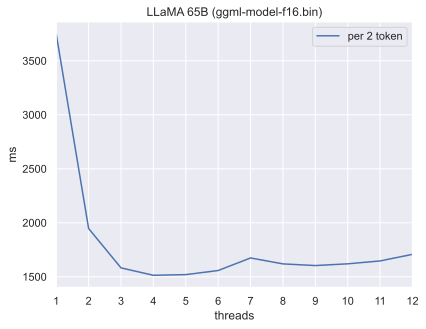

In [6]:
title = "LLaMA 65B (ggml-model-f16.bin)"
df[['threads', 'time_per_token']].groupby('threads').mean().plot(xlim=(1,12), xticks=([*range(13)]), ylabel="ms", title=title).legend(["per 2 token"]);